In [58]:
import os, copy, re
import pandas as pd
from sklearn.decomposition import PCA

path = os.getcwd() + "/data/train_data.csv"
music = pd.read_csv(path)

# add in sentiment
sentiment = pd.read_csv('data/sent_data.csv')
music['sentiment'] = sentiment.sentiment

x = music.drop(['billboard','lyrics', 'Unnamed: 0','release.id'], axis=1).values
y = music['billboard']

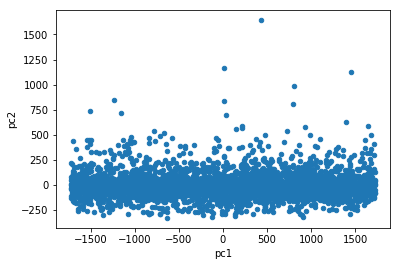

In [59]:
# pca analysis
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(x)
reduced_x

pca_df = pd.DataFrame(data=reduced_x, columns=['pc1','pc2'])
pca_df['billboard'] = y
pca_df.head(5)

pca_df.plot(kind='scatter',x='pc1',y='pc2')

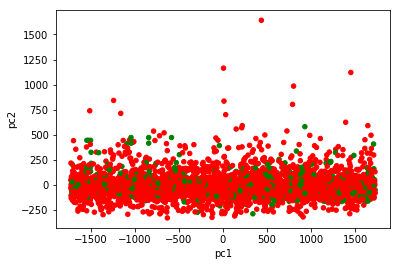

In [60]:
# create PCA plot 
colors=[]
for bbclass in pca_df['billboard']:
    if bbclass==0:
        colors.append('red')
    else:
        colors.append('green')


plot = pca_df.plot(kind='scatter',x='pc1',y='pc2',color=colors)
plot.figure.savefig("figures/pca.pdf")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


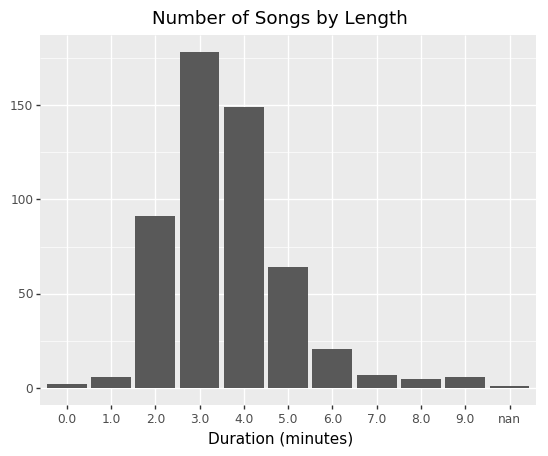

<ggplot: (7012655480)>

In [57]:
# song duration
from plotnine import *
import numpy as np

hits = music[music.billboard==1]
hits['duration_group'] = pd.cut(hits.duration,
                     bins=np.arange(0,660,60),
                     labels=np.arange(0,10,1))

p = (ggplot(hits)         # defining what data to use
 + aes(x='duration_group')    # defining what variable to use
 + geom_bar(size=2)
 + labs(title="Number of Songs by Length", x="Duration (minutes)",y="")
)
#ggsave(p,"figures/duration_freq.pdf")
p

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


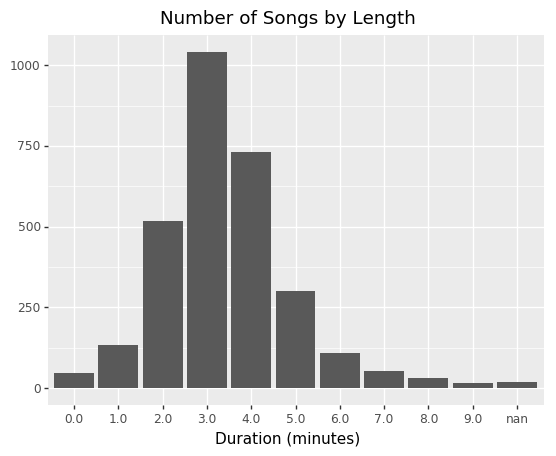

<ggplot: (-9223372029842074273)>

In [55]:
# same but for duds
duds = music[music.billboard==0 & (music.duration<660)]
duds['duration_group'] = pd.cut(duds.duration/,
                     bins=np.arange(0,660,60),
                     labels=np.arange(0,10,1))

p = (ggplot(duds)         # defining what data to use
 + aes(x='duration_group')    # defining what variable to use
 + geom_bar(size=2)
 + labs(title="Number of Songs by Length", x="Duration (minutes)",y="")
)
#ggsave(p,"figures/duration_freq.pdf")
p